<imc src = "images.jpeg" >

<center><img src = "images.jpeg"></center>

In [35]:
# 패키지 로딩하기
import re
import pandas            as pd
import matplotlib.pyplot as plt
import networkx          as nx

from konlpy.tag             import Okt
from collections            import Counter
from wordcloud              import WordCloud
from itertools              import combinations
from gensim                 import corpora
from gensim.models.ldamodel import LdaModel

#### I. 텍스트 처리의 기본

In [4]:
text = '대통령실은 "최근 미국 경기 경착륙 우려와 지정학적 리스크 등으로 글로벌 증시가 등락을 반복하는 등 국제금융시장의 변동성이 확대되면서 우리 증시도 크게 영향을 받고 있다"며 "이런 상황에서 주가 하락의 원인을 제공할 수 있는 금투세 시행이 강행될 경우 대부분이 중산층인 1400만 일반 국민 투자자가 피해를 받게 될 것"이라고 지적했다.'

In [5]:
# 1. 공백을 기준으로 분리
words = text.split()
words

['대통령실은',
 '"최근',
 '미국',
 '경기',
 '경착륙',
 '우려와',
 '지정학적',
 '리스크',
 '등으로',
 '글로벌',
 '증시가',
 '등락을',
 '반복하는',
 '등',
 '국제금융시장의',
 '변동성이',
 '확대되면서',
 '우리',
 '증시도',
 '크게',
 '영향을',
 '받고',
 '있다"며',
 '"이런',
 '상황에서',
 '주가',
 '하락의',
 '원인을',
 '제공할',
 '수',
 '있는',
 '금투세',
 '시행이',
 '강행될',
 '경우',
 '대부분이',
 '중산층인',
 '1400만',
 '일반',
 '국민',
 '투자자가',
 '피해를',
 '받게',
 '될',
 '것"이라고',
 '지적했다.']

In [8]:
# 2. 특수기호를 삭제하기
words = re.sub(r'[^가-힣\s]', '', text)
words = words.split()
words

['대통령실은',
 '최근',
 '미국',
 '경기',
 '경착륙',
 '우려와',
 '지정학적',
 '리스크',
 '등으로',
 '글로벌',
 '증시가',
 '등락을',
 '반복하는',
 '등',
 '국제금융시장의',
 '변동성이',
 '확대되면서',
 '우리',
 '증시도',
 '크게',
 '영향을',
 '받고',
 '있다며',
 '이런',
 '상황에서',
 '주가',
 '하락의',
 '원인을',
 '제공할',
 '수',
 '있는',
 '금투세',
 '시행이',
 '강행될',
 '경우',
 '대부분이',
 '중산층인',
 '만',
 '일반',
 '국민',
 '투자자가',
 '피해를',
 '받게',
 '될',
 '것이라고',
 '지적했다']

In [9]:
# 3. 숫자를 제거하기
text       = re.sub(r'[^가-힣\s]', '', text)
text       = re.sub(r'\d+', '', text)

In [10]:
words = text.split()
words

['대통령실은',
 '최근',
 '미국',
 '경기',
 '경착륙',
 '우려와',
 '지정학적',
 '리스크',
 '등으로',
 '글로벌',
 '증시가',
 '등락을',
 '반복하는',
 '등',
 '국제금융시장의',
 '변동성이',
 '확대되면서',
 '우리',
 '증시도',
 '크게',
 '영향을',
 '받고',
 '있다며',
 '이런',
 '상황에서',
 '주가',
 '하락의',
 '원인을',
 '제공할',
 '수',
 '있는',
 '금투세',
 '시행이',
 '강행될',
 '경우',
 '대부분이',
 '중산층인',
 '만',
 '일반',
 '국민',
 '투자자가',
 '피해를',
 '받게',
 '될',
 '것이라고',
 '지적했다']

In [11]:
# 4. 금투세 -> 금융투자소득세
text  = text.replace("금투세", "금융투자소득세")
words = text.split()
words

['대통령실은',
 '최근',
 '미국',
 '경기',
 '경착륙',
 '우려와',
 '지정학적',
 '리스크',
 '등으로',
 '글로벌',
 '증시가',
 '등락을',
 '반복하는',
 '등',
 '국제금융시장의',
 '변동성이',
 '확대되면서',
 '우리',
 '증시도',
 '크게',
 '영향을',
 '받고',
 '있다며',
 '이런',
 '상황에서',
 '주가',
 '하락의',
 '원인을',
 '제공할',
 '수',
 '있는',
 '금융투자소득세',
 '시행이',
 '강행될',
 '경우',
 '대부분이',
 '중산층인',
 '만',
 '일반',
 '국민',
 '투자자가',
 '피해를',
 '받게',
 '될',
 '것이라고',
 '지적했다']

### II. 뉴스 : 명사 추출

In [13]:
# 1. 뉴스 데이터 읽어오기 : xlsx
news = pd.read_excel(io         = "d:/NCRC/News.xlsx",
                     header     = 0,
                     sheet_name = 0)
news.head(n = 1)

뉴스 식별자        일자     언론사  기고자                             제목  \
0  1.100751e+06  20240806  아시아투데이  NaN  정부, 아동 목소리 반영한 '기후변화' 정책 내놓는다   

     통합 분류1 통합 분류2 통합 분류3 사건/사고 분류1 사건/사고 분류2 사건/사고 분류3  \
0  사회>교육_시험    NaN    NaN       NaN       NaN       NaN   

                                        인물                     위치  \
0  김도예,이기일,아동대표,오준,김미애,정익중,장예린,강선우,김세은,박주민  한국아동단체협의회,민시우 아동,대한민국   

                                    기관  \
0  보건복지부,정부,아동권리보장원,아시아투데이,복지부,보건복지위원회   

                                                 키워드  \
0  정부,반영,아동,목소리,기후변화,정책,아시아투데,한제윤,기후변화,아동,이야기,자리,...   

                                   특성추출(가중치순 상위 50개)  \
0  한국아동단체협의회,기후변화,대한민국,전년도,아동권리보장원,개회식,박주민,제1차관,결...   

                                                  본문  \
0  아시아투데이 한제윤 기자 = 기후변화에 대한 아동의 이야기를 듣는 자리가 마련됐다....   

                                                 URL 분석제외 여부  
0  https://www.asiatoday.co.kr/view.php?key=20240...     NaN

In [14]:
# 2. 제목 : 텍스트 전처리(특수기호)
news['제목'] = news['제목'].apply(lambda x: re.sub(r'[^가-힣\s]', '', x))

In [17]:
# 3. 제목 : 텍스트 전처리
# [로 시작해서 ]로 끝나는 단어는 삭제
news['제목'] = news['제목'].apply(lambda x: re.sub(r'\[.*?\]', '', x).strip())
news['제목'][29] 

'비즈투데이 정상혁 신한은행장 아동학대예방 릴레이 캠페인 참여'

In [19]:
# 3. 제목에서 명사만 추출하기
okt = Okt()
news['제목2'] = news['제목'].apply(lambda x: ' '.join(okt.nouns(x)))
news['제목2'].head()

0                   정부 아동 목소리 반영 기후변화 정책
1    이경윤 전북 문화 관광 재단 대표이사 아동학대 예방 캠페인 동참
2         보건복지부 기후변화 속 아동 위기 의식 아동 총회 개최
3             안산 문화재단 아동학대 예방 릴레이 캠페인 참여
4                        가족 찾기 캠페인 가족 찾기
Name: 제목2, dtype: object

In [22]:
# 모든 제목에서 명사 추출
nouns = []
for title in news['제목']:
    nouns.extend([noun for noun in okt.nouns(title) if len(noun) >= 2])

# 명사 빈도 계산
nouns_freq = Counter(nouns)

# 빈도를 데이터프레임으로 변환
nouns_freq_df = pd.DataFrame(nouns_freq.items(), columns=['명사', '빈도']).sort_values(by='빈도', ascending=False)
nouns_freq_df

명사  빈도
14    캠페인  65
1      아동  63
12   아동학대  60
13     예방  58
138    출산  49
..    ...  ..
374    현대   1
128    중대   1
372    발급   1
371  선불카드   1
609    축복   1

[610 rows x 2 columns]

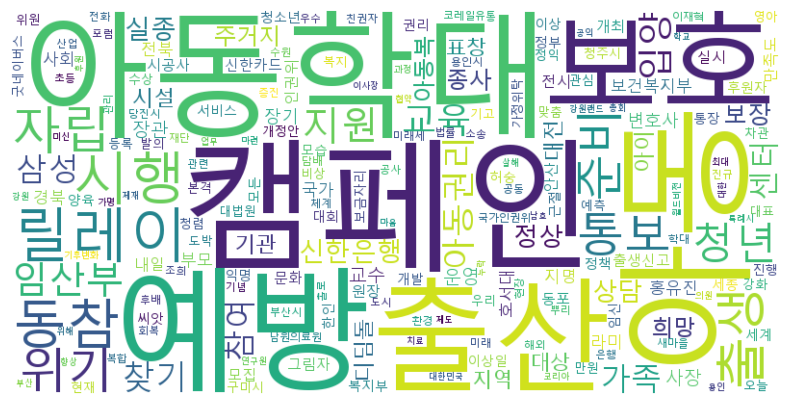

In [24]:
# 4. 워드 클라우드 작성하기
wordcloud = WordCloud(font_path        = 'c:/Windows/Fonts/malgun.ttf', 
                      background_color = 'white', 
                      width            = 800, 
                      height           = 400).generate_from_frequencies(nouns_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# 5. 동시출현빈도

nouns_list = []
for title in news['제목']:
    nouns = [noun for noun in okt.nouns(title) if len(noun) >= 2]
    nouns_list.append(nouns)

co_occurrence_freq = Counter()

for nouns in nouns_list:
    for combo in combinations(nouns, 2):
        co_occurrence_freq[tuple(sorted(combo))] += 1

# 동시출현빈도를 데이터프레임으로 변환
co_occurrence_df = pd.DataFrame(co_occurrence_freq.items(), 
                                columns = ['명사쌍', '빈도']).sort_values(by = '빈도', ascending = False)

co_occurrence_df

명사쌍  빈도
54     (아동학대, 예방)  53
55    (아동학대, 캠페인)  52
57      (예방, 캠페인)  52
700      (보호, 출산)  47
96     (릴레이, 캠페인)  41
...           ...  ..
2075    (베이비, 보리)   1
2076   (베이비, 보리차)   1
2077    (베이비, 출시)   1
2078    (안심, 유기농)   1
4088     (축복, 환경)   1

[4089 rows x 2 columns]

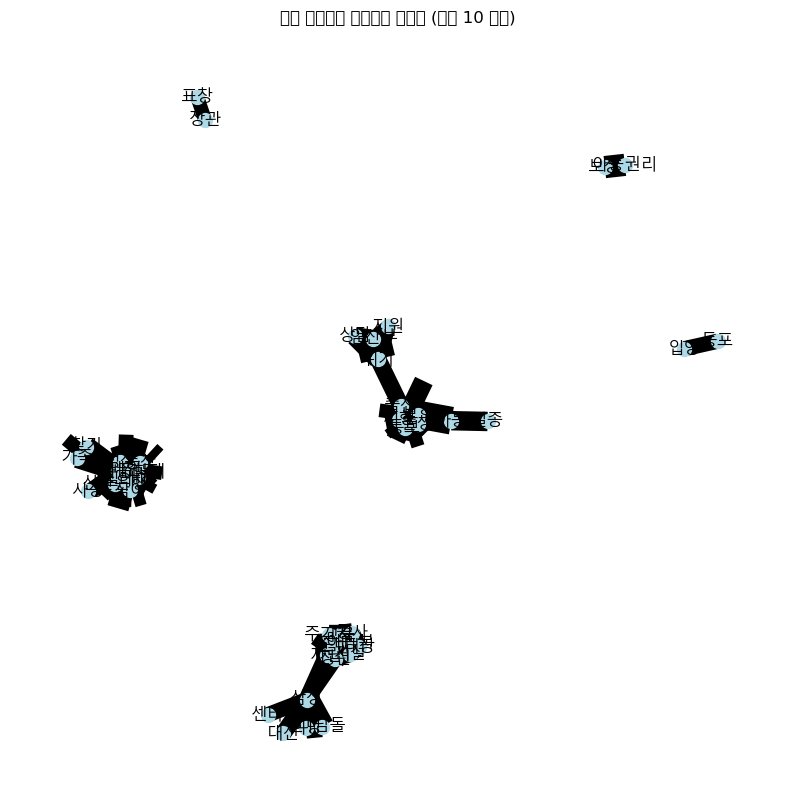

In [32]:
# 동시출현빈도 계산
# 모든 제목에서 명사 추출 (길이가 2 이상인 명사만)
nouns_list = []
for title in news['제목']:
    nouns = [noun for noun in okt.nouns(title) if len(noun) >= 2]
    nouns_list.append(nouns)

# 동시출현빈도 계산
co_occurrence_freq = Counter()

for nouns in nouns_list:
    for combo in combinations(nouns, 2):
        co_occurrence_freq[tuple(sorted(combo))] += 1

# 동시출현빈도 10 이상인 것만 필터링
filtered_co_occurrence = {pair: freq for pair, freq in co_occurrence_freq.items() if freq >= 10}

# 네트워크 그래프 생성
G = nx.Graph()

# 노드와 엣지를 추가
for (word_pair, freq) in filtered_co_occurrence.items():
    G.add_edge(word_pair[0], word_pair[1], weight=freq)

# 네트워크 그래프 시각화
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=100)
nx.draw_networkx_edges(G, pos, width=[d['weight'] for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Malgun Gothic')
plt.title('명사 동시출현 네트워크 그래프 (빈도 10 이상)')
plt.axis('off')
plt.show()

In [36]:
# 6. 토픽모델
nouns_list = []
for title in news['제목']:
    nouns = [noun for noun in okt.nouns(title) if len(noun) >= 2]
    nouns_list.append(nouns)

# 단어 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(nouns_list)
corpus = [dictionary.doc2bow(text) for text in nouns_list]

# LDA 모델 훈련
lda = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# 각 토픽의 상위 단어 출력
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.061*"아동학대" + 0.059*"예방" + 0.057*"캠페인" + 0.044*"릴레이" + 0.037*"동참"')
(1, '0.054*"아동" + 0.033*"보호" + 0.033*"출생" + 0.030*"통보" + 0.027*"출산"')
(2, '0.027*"준비" + 0.026*"출산" + 0.026*"청년" + 0.025*"자립" + 0.024*"위기"')


In [37]:
topics_df = pd.DataFrame([{'토픽': i+1, '상위 단어': topic} for i, (topic_num, topic) in enumerate(topics)])
topics_df

토픽                                              상위 단어
0   1  0.061*"아동학대" + 0.059*"예방" + 0.057*"캠페인" + 0.04...
1   2  0.054*"아동" + 0.033*"보호" + 0.033*"출생" + 0.030*"...
2   3  0.027*"준비" + 0.026*"출산" + 0.026*"청년" + 0.025*"...

In [38]:
# LDA 모델 훈련
lda = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# 제목별로 토픽 확률 분포 계산
doc_topics = []
for i, row in enumerate(lda[corpus]):
    topic_dist = {f"토픽_{j+1}": prob for j, (topic_id, prob) in enumerate(row)}
    topic_dist["제목"] = news["제목"][i]
    doc_topics.append(topic_dist)

# 결과를 데이터프레임으로 변환
doc_topics_df = pd.DataFrame(doc_topics)
doc_topics_df

토픽_1      토픽_2      토픽_3  \
0    0.897680  0.048827  0.053493   
1    0.470030  0.030444  0.499526   
2    0.816497  0.146082  0.037421   
3    0.041805  0.041721  0.916475   
4    0.057715  0.738367  0.203918   
..        ...       ...       ...   
293  0.903369  0.048031  0.048600   
294  0.947709  0.025964  0.026327   
295  0.039399  0.921393  0.039208   
296  0.040442  0.921756  0.037803   
297  0.068462  0.864560  0.066978   

                                                    제목  
0                           정부 아동 목소리 반영한 기후변화 정책 내놓는다  
1                      이경윤 전북문화관광재단 대표이사 아동학대예방 캠페인 동참  
2                        보건복지부 기후변화 속 아동의 위기의식 아동총회 개최  
3                             안산문화재단 아동학대예방 릴레이 캠페인 참여  
4                                    가족찾기 캠페인잃어버린 가족찾기  
..                                                 ...  
293                          아동 입양 전 과정 민간 대신 정부가 책임진다  
294               국외입양 최소화해 국내입양 활성화 정부 공적 입양체계 구축 나선다  
295                   먼저 경험한 선배들 지혜  자립 준비 후배들에 도움 될 것  
296  개월 전 가슴으로 낳은 둘째 딸 어버이날 무슨 선물이 더 필요할까요잠시만 부모가 되...  
297                       보호출산제 어떤 환경에서 태어나도 축복받을 수 있게  

[298 rows x 4 columns]

In [39]:
# 엑셀 데이터로 저장하기
doc_topics_df.to_excel("d:/NCRC/topics.xlsx", index = False)